In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Logistic_Reg.csv')
data.head()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome
0,6.2,9.3,7.4,1
1,2.6,2.2,8.7,1
2,9.5,1.5,8.2,1
3,2.6,5.0,0.4,0
4,10.0,7.7,7.2,1


In [3]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(x,'\n',  y)

[[ 6.2  9.3  7.4]
 [ 2.6  2.2  8.7]
 [ 9.5  1.5  8.2]
 ..., 
 [ 2.3  0.7  5.5]
 [ 0.9  4.8  3. ]
 [ 2.5  0.   7.4]] 
 [1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0
 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0
 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 67,   8],
       [  0, 170]])

In [12]:
acc = (cm.diagonal().sum()/cm.sum())*100
acc

96.734693877551024

In [18]:
cm = confusion_matrix(y, classifier.predict(sc.fit_transform(x)))
cm
acc = (cm.diagonal().sum()/cm.sum())
acc*100

97.040816326530603

In [22]:
def myFunc(cm):
    return (cm.diagonal().sum()/cm.sum())*100

myFunc(cm)

97.040816326530603

In [23]:
from mpl_toolkits.mplot3d import Axes3D

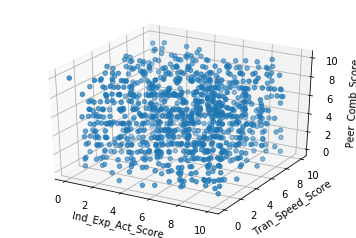

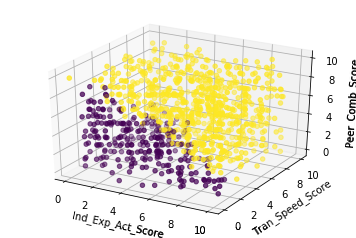

In [43]:
fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2])
ax1.set_xlabel('Ind_Exp_Act_Score')
ax1.set_ylabel('Tran_Speed_Score')
ax1.set_zlabel('Peer_Comb_Score')

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],c=y, marker='o')
ax2.set_xlabel('Ind_Exp_Act_Score')
ax2.set_ylabel('Tran_Speed_Score')
ax2.set_zlabel('Peer_Comb_Score')

plt.show()